In [1]:
import pandas as pd

# Cargar CSV limpio
df = pd.read_csv("../data/processed/DJIA_news_clean.csv")

# Convertir la fecha a datetime otra vez para análisis temporal
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from itertools import chain

sns.set_style("whitegrid")


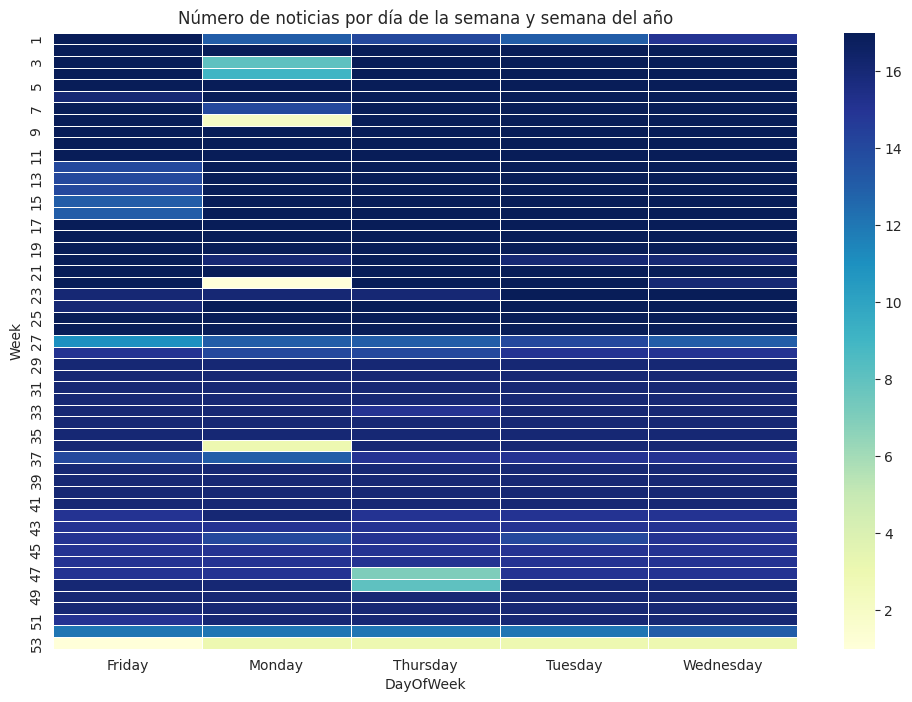

In [10]:
df['Week'] = df['Date'].dt.isocalendar().week
df['DayOfWeek'] = df['Date'].dt.day_name()

pivot = df.pivot_table(index='Week', columns='DayOfWeek', values='Label', aggfunc='count').fillna(0)

plt.figure(figsize=(12,8))
sns.heatmap(pivot, cmap='YlGnBu', linewidths=.5)
plt.title("Número de noticias por día de la semana y semana del año")
plt.show()



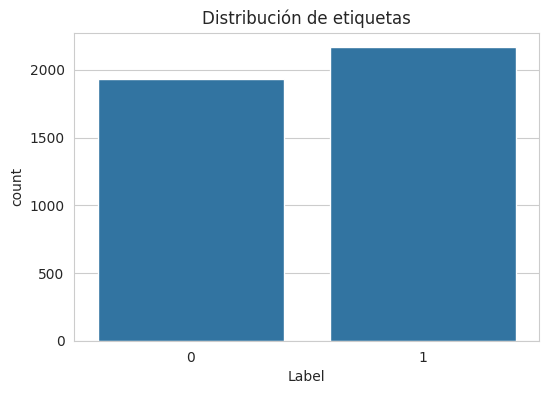

In [5]:
plt.figure(figsize=(6,4))
sns.countplot(x='Label', data=df)
plt.title("Distribución de etiquetas")
plt.show()


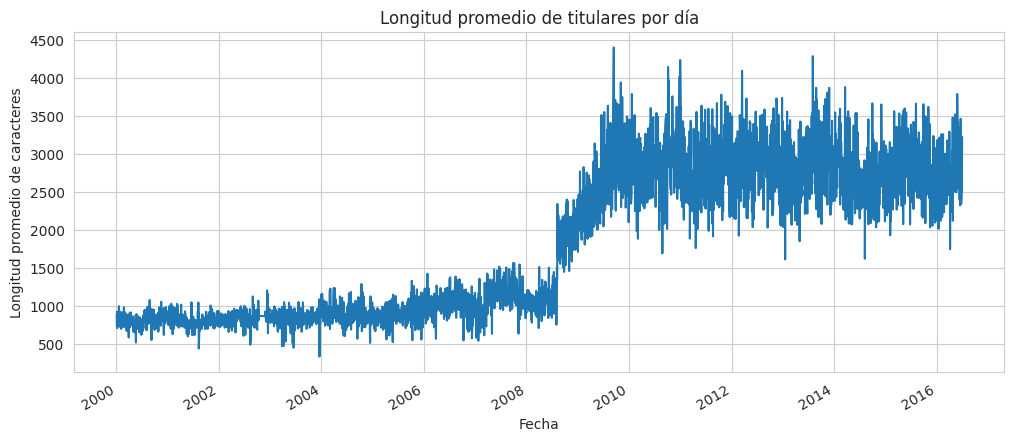

In [6]:
# Longitud total de titulares por fila
df['title_length'] = df.iloc[:,2:].apply(lambda x: x.str.len().sum(), axis=1)

plt.figure(figsize=(12,5))
df.groupby('Date')['title_length'].mean().plot()
plt.title("Longitud promedio de titulares por día")
plt.xlabel("Fecha")
plt.ylabel("Longitud promedio de caracteres")
plt.show()


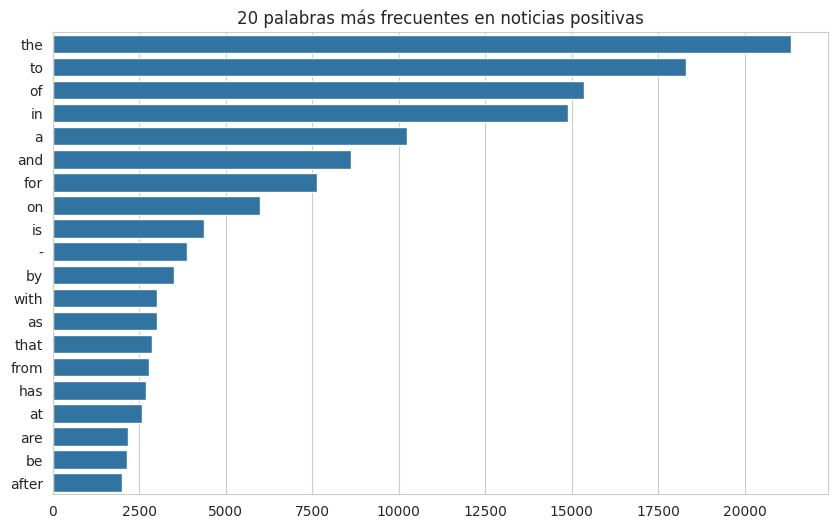

In [7]:
# Unir todos los titulares de Label=1
text_data = df[df['Label']==1].iloc[:,2:].values.flatten()
words = list(chain.from_iterable([str(t).split() for t in text_data]))
most_common = Counter(words).most_common(20)

plt.figure(figsize=(10,6))
sns.barplot(x=[w[1] for w in most_common], y=[w[0] for w in most_common])
plt.title("20 palabras más frecuentes en noticias positivas")
plt.show()


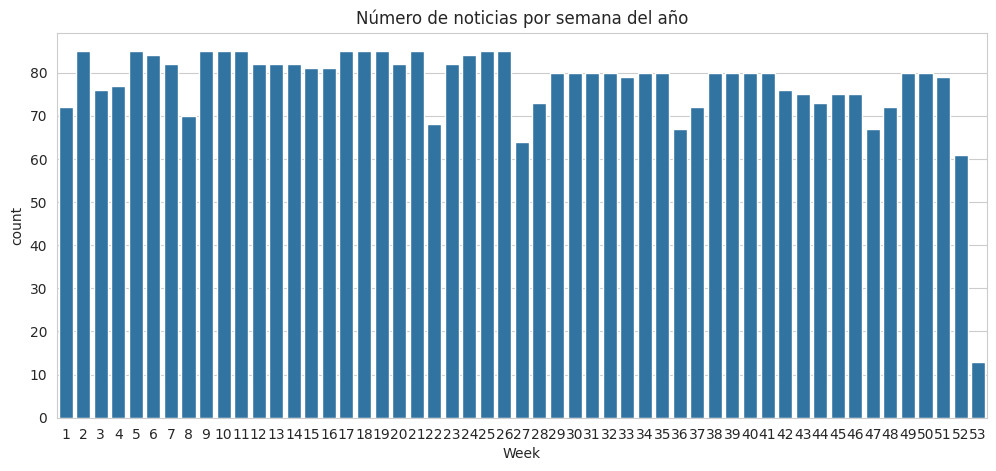

In [8]:
df['Week'] = df['Date'].dt.isocalendar().week

plt.figure(figsize=(12,5))
sns.countplot(x='Week', data=df)
plt.title("Número de noticias por semana del año")
plt.show()
